# Load Google Contrails Forecasts

> Requires a valid Google API key, enabled for the Contrails API.

### References

- [Google Contrails API](https://developers.google.com/contrails)

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd

from pycontrails.datalib.google_forecast import GoogleForecast, Severity

In [2]:
gf = GoogleForecast(
    # The API provides hourly forecasts, e.g. +24h into the future.
    time=(pd.Timestamp.now() + pd.Timedelta("24h")).floor("h"),
    variables=(Severity),  # Also supports EffectiveEnergyForcing.
    # key="YOUR_API_KEY",  # Optional if GOOGLE_API_KEY env var is set
)

met = gf.open_metdataset()
met

MetDataset with data:

<xarray.Dataset> Size: 75MB
Dimensions:                  (longitude: 1441, latitude: 721, level: 18, time: 1)
Coordinates:
  * longitude                (longitude) float64 12kB -180.0 -179.8 ... 180.0
  * latitude                 (latitude) float64 6kB -90.0 -89.75 ... 89.75 90.0
  * level                    (level) float64 144B 154.7 162.4 ... 329.3 344.3
  * time                     (time) datetime64[ns] 8B 2026-02-05T16:00:00
    flight_level             (level) int16 36B 440 430 420 410 ... 290 280 270
    forecast_reference_time  (time) datetime64[ns] 8B 2026-02-04T15:00:00
    air_pressure             (level) float32 72B 1.547e+04 ... 3.443e+04
    altitude                 (level) float32 72B 1.341e+04 ... 8.23e+03
Data variables:
    contrails                (longitude, latitude, level, time) float32 75MB ...
Attributes:
    inference_pipeline_version:  contrails.forecast-pipeline_20260129.02_p0
    api_version:                 contrails.api-service_20260203.02_p0
    aircraft_class:              default
    provider:                    Google
    dataset:                     Contrails Forecast
    product:                     forecast

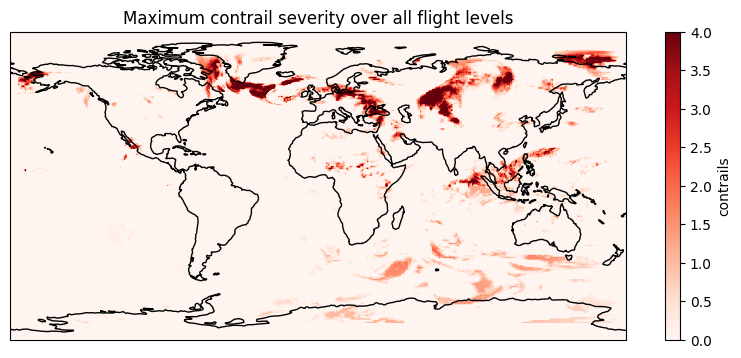

In [3]:
severity_da = met.data["contrails"].isel(time=0).max(dim="level")
p = severity_da.plot(
    x="longitude",
    y="latitude",
    cmap="Reds",
    subplot_kws=dict(projection=ccrs.PlateCarree(), transform=ccrs.PlateCarree()),
    figsize=(10, 4),
)
p.axes.coastlines()
plt.title("Maximum contrail severity over all flight levels");